In [22]:
%reload_ext rpy2.ipython
%R library(dplyr); library(magrittr); library(ggplot2)

<StrVector - Python:0x10b01cdd0 / R:0x107b8c400>
[str, str, str, ..., str, str, str]

In [23]:
%%R
syn<-read.table("syn.genomeinfo.txt", sep="\t")
print("ok")
syn$host_genus<-"Syn/Pro"
vib<-read.table("vib.genomeinfo.txt", sep="\t")
print("ok")
vib$host_genus<-"Vibrio"
myco<-read.table("myco.genomeinfo.txt", sep="\t", fill=TRUE)
print("ok")
myco$host_genus<-"Mycobacterium"

together<-rbind.data.frame(syn, vib, myco)


synt<-read.table("syn_tRNA_summary.txt", header=TRUE, sep="\t")
vibt<-read.table("vib_tRNA_summary.txt", header=TRUE, sep="\t")
mycot<-read.table("myco_tRNA_summary.txt", header=TRUE, sep="\t", fill=TRUE)
trnatog<-rbind.data.frame(synt, vibt, mycot)

colnames(together)<-c("phage_full","phage_short", "tax","size","gc", "host_genus")

together$phage_full<-gsub(" ","",together$phage_full)
trnatog$phage_full<-gsub(" ","", trnatog$phage_full)


print(summary(together))
print(head(trnatog))

[1] "ok"
[1] "ok"
[1] "ok"
  phage_full                       phage_short                         tax     
 Length:569          Vibrio phage PV94   :  2   Siphoviridae             :420  
 Class :character    Cyanophage 9515-10a :  1   Myoviridae               : 75  
 Mode  :character    Cyanophage KBS-M-1A :  1   Podoviridae              : 38  
                     Cyanophage KBS-P-1A :  1   Inovirus                 : 20  
                     Cyanophage KBS-S-2A :  1   unclassified dsDNA phages:  5  
                     Cyanophage MED4-117 :  1   unclassified phages      :  5  
                    (Other)              :562   (Other)                  :  6  
      size              gc         host_genus       
 Min.   :  6340   Min.   :34.50   Length:569        
 1st Qu.: 50963   1st Qu.:58.78   Class :character  
 Median : 58472   Median :63.06   Mode  :character  
 Mean   : 69546   Mean   :59.46                     
 3rd Qu.: 70270   3rd Qu.:65.38                     
 Max.   :248088

In [24]:
%%R
trna_summary<-trnatog%>%group_by(phage_full)%>%summarise(trna_count=n())
print(trna_summary)

Source: local data frame [206 x 2]

   phage_full trna_count
1  AF022214.1          5
2  AY129331.1          2
3  AY129332.1          3
4  AY129333.1          1
5  AY129337.1         26
6  AY129338.1          2
7  DQ149023.2          6
8  DQ398041.1          2
9  DQ398043.1          3
10 DQ398052.2         20
..        ...        ...


In [25]:
%%R
together$trna_count<-trna_summary$trna_count[match(together$phage_full, trna_summary$phage_full)]

In [26]:
%%R
together[is.na(together)]<-0
head(together)
together$host_genus<-as.character(together$host_genus)%>%as.factor
str(together)

trna_check<-vector()

for (line in together$trna_count){
    if (line>0){
        trna_check<-c(trna_check, 1)
    }
    else {trna_check<-c(trna_check, 0)}
}
together<-cbind.data.frame(together, trna_check)
head(together)

'data.frame':	569 obs. of  7 variables:
 $ phage_full : chr  "NC_016656.1" "NC_020845.1" "NC_009531.1" "DQ875742.1" ...
 $ phage_short: Factor w/ 568 levels " Cyanophage 9515-10a",..: 12 7 20 13 9 8 1 17 14 15 ...
 $ tax        : Factor w/ 8 levels "Caudovirales",..: 1 2 3 3 3 3 3 2 3 4 ...
 $ size       : int  45890 180977 46214 40938 47536 47741 47055 161440 42480 107530 ...
 $ gc         : num  37.9 37.8 55 51.8 39.9 ...
 $ host_genus : Factor w/ 3 levels "Mycobacterium",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ trna_count : num  0 0 0 0 0 1 0 10 0 0 ...
   phage_full            phage_short          tax   size       gc host_genus
1 NC_016656.1      Cyanophage P-SSP2 Caudovirales  45890 37.93201    Syn/Pro
2 NC_020845.1    Cyanophage MED4-213   Myoviridae 180977 37.76447    Syn/Pro
3 NC_009531.1        Cyanophage Syn5  Podoviridae  46214 54.97036    Syn/Pro
4  DQ875742.1     Cyanophage Pf-WMP4  Podoviridae  40938 51.80273    Syn/Pro
5 NC_016659.1  Cyanophage NATL2A-133  Podoviridae  47536 39.87

In [27]:
%%R
write.table(together, file="syn_vib_myco_phage_info.txt", row.names=FALSE, quote=FALSE, sep="\t")

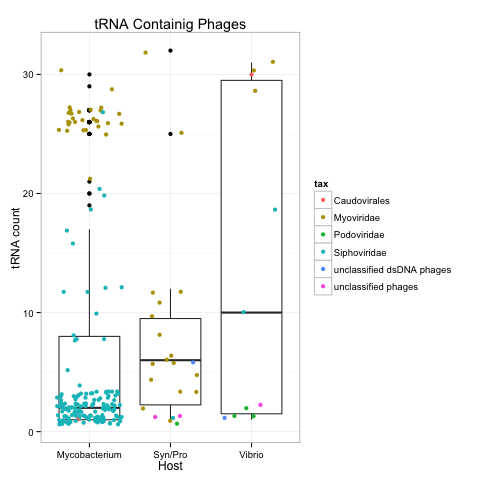

In [28]:
%%R
p <- ggplot(together[together$trna_count>0,], aes(factor(host_genus), trna_count))
p<-p+geom_boxplot()+theme_bw()+geom_jitter(aes(color=tax))+labs(x="Host", y="tRNA count",title="tRNA Containig Phages")

plot(p)

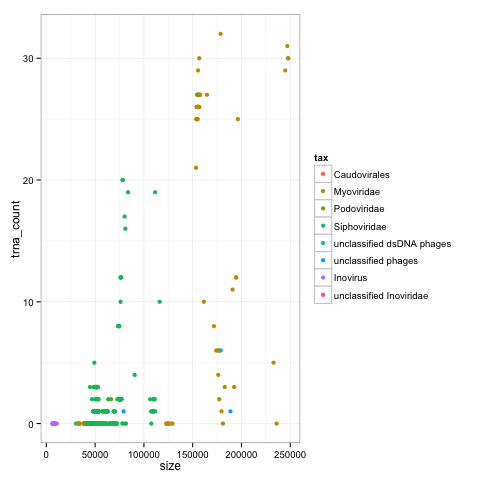

In [29]:
%%R
q<-ggplot(together, aes(size, trna_count))+geom_point(aes(color=tax))+theme_bw()
plot(q)

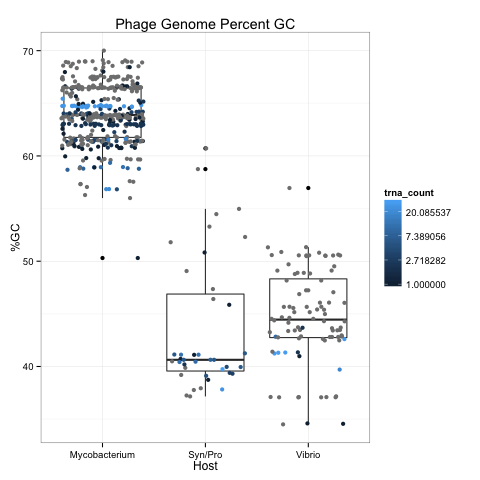

In [30]:
%%R
r<-ggplot(together, aes(x=factor(host_genus), y=gc))+geom_boxplot()
r<-r+geom_jitter(aes(color=trna_count))+scale_colour_gradient(trans = "log")+theme_bw()
r<-r+labs(x="Host", y="%GC", title="Phage Genome Percent GC")
plot(r)

In [10]:
%%R
together%>%group_by(host_genus)%>%summarise(mean_gc=mean(gc))->norm_gc
norm_gc[1,2]
together%>%filter(host_genus=="Mycobacterium")%>%mutate(gc_norm=gc-as.numeric(norm_gc[1,2]))->a
together%>%filter(host_genus=="Syn/Pro")%>%mutate(gc_norm=gc-as.numeric(norm_gc[2,2]))->b
together%>%filter(host_genus=="Vibrio")%>%mutate(gc_norm=gc-as.numeric(norm_gc[3,2]))->c
together<-rbind.data.frame(a,b,c)
summary(together)

  phage_full                       phage_short                         tax     
 Length:569          Vibrio phage PV94   :  2   Siphoviridae             :420  
 Class :character    Cyanophage 9515-10a :  1   Myoviridae               : 75  
 Mode  :character    Cyanophage KBS-M-1A :  1   Podoviridae              : 38  
                     Cyanophage KBS-P-1A :  1   Inovirus                 : 20  
                     Cyanophage KBS-S-2A :  1   unclassified dsDNA phages:  5  
                     Cyanophage MED4-117 :  1   unclassified phages      :  5  
                    (Other)              :562   (Other)                  :  6  
      size              gc                host_genus    trna_count   
 Min.   :  6340   Min.   :34.50   Mycobacterium:438   Min.   : 0.00  
 1st Qu.: 50963   1st Qu.:58.78   Syn/Pro      : 39   1st Qu.: 0.00  
 Median : 58472   Median :63.06   Vibrio       : 92   Median : 0.00  
 Mean   : 69546   Mean   :59.46                       Mean   : 2.67  
 3rd Qu.: 

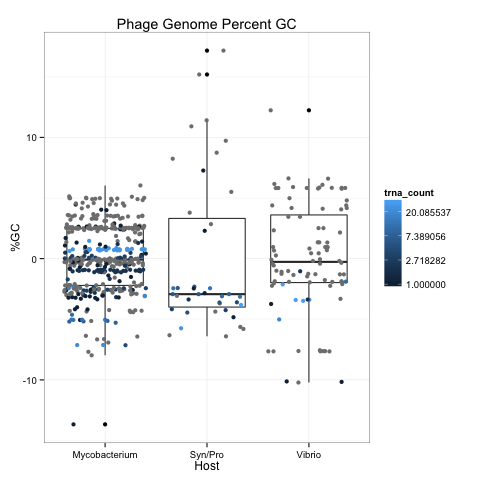

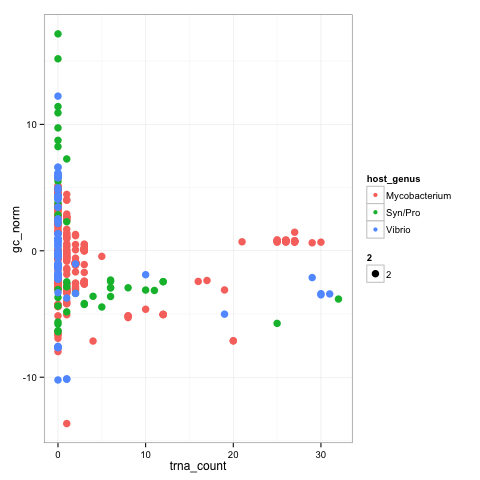

In [11]:
%%R
r<-ggplot(together, aes(x=factor(host_genus), y=gc_norm))+geom_boxplot()
r<-r+geom_jitter(aes(color=trna_count))+scale_colour_gradient(trans = "log")+theme_bw()
r<-r+labs(x="Host", y="%GC", title="Phage Genome Percent GC")
plot(r)

z<-ggplot(together, aes(x=trna_count, y=gc_norm))+geom_point(aes(col=host_genus, cex=2))+theme_bw()

plot(z)

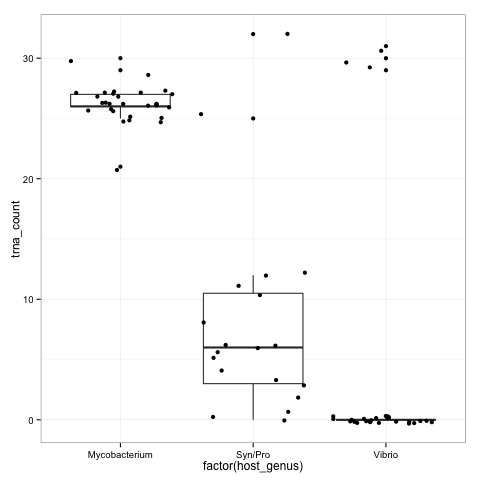

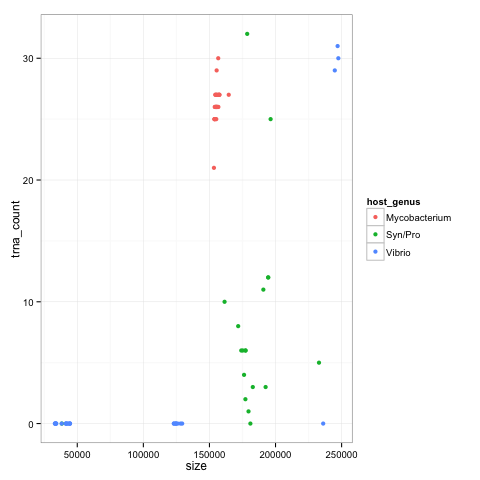

In [37]:
%%R
myos<-filter(together, tax=="Myoviridae")
m<-ggplot(myos, aes(factor(host_genus), trna_count))+geom_boxplot()+theme_bw()
m<-m+geom_jitter()
plot(m)

mgs<-ggplot(myos, aes(size, trna_count))+geom_point(aes(color=host_genus))+theme_bw()
plot(mgs)

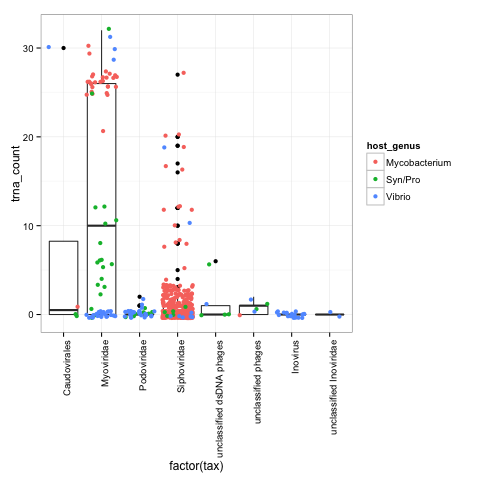

In [13]:
%%R
t<-ggplot(together, aes(factor(tax), trna_count))+geom_boxplot()+theme_bw()
t<-t+geom_jitter(aes(col=host_genus))+theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot(t)

In [14]:
%%R
codon<-read.table("codon_table2.txt", sep="\t", header=TRUE)
tt<-trnatog

aa<-codon[,c(6,4,3,5,2)]%>%unique
trnatog$codon_num<-aa$redundants[match(trnatog$tRNA, aa$abrev)]
trnatog$host<-together$host_genus[match(trnatog$phage_full, together$phage_full)]
head(trnatog)
head(aa)

   abrev          name aa        chem redundants
1    Ala       Alanine  A hydrophobic          4
5    Cys      Cysteine  C       polar          2
7    Glu Glutamic acid  E     charged          2
9    Asp Aspartic acid  D     charged          2
11   Gly       Glycine  G hydrophobic          4
15   Phe Phenylalanine  F hydrophobic          2


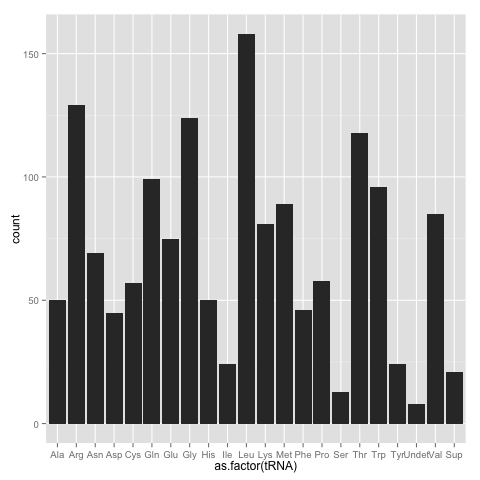

In [16]:
%%R
n<-ggplot(tt, aes(x=as.factor(tRNA)))+geom_bar()
plot(n)

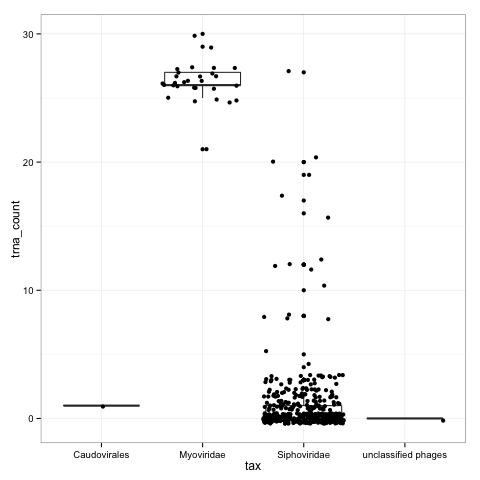

In [17]:
%%R
myco<-filter(together, host_genus=="Mycobacterium")
mplot<-ggplot(myco, aes(x=tax, y=trna_count))+geom_boxplot()+geom_jitter()
plot(mplot+theme_bw())